In [10]:
from itertools import count

'''
5 bile roșii, 3 bile albastre, 2 bile verzi
A: "cel putin o bila extrasa este rosie"
B: "toate bilele extrase au aceeași culoare"
P(B|A) <=> probabilitatea ca B sa aiba loc, daca A a vut loc
'''
from random import choices, sample
from math import comb
def estimated_probability(tests_count = 2000):
    balls = ['red'] + ['blue'] + ['green']

    cntA = 0
    cntAB = 0

    for _ in range(tests_count):        
        extracted_balls = sample(balls, counts=[5, 3, 2], k=3)
    
        # if A takes place (at least one red ball)
        if extracted_balls.count('red') > 0:
            cntA += 1
            # we check if B also takes place (all balls are the same color)
            if extracted_balls.count(extracted_balls[0]) == 3:
                cntAB += 1
    
    return cntAB / cntA

def theoretical_probability():
    # P(B | A) = P(A & B)/P(A)
    # P(A & B) = P("all red") = comb(5,3)/comb(10,3)
    # P(A) = P("at least one red")
    # P(A = 1 - P(!A) = 1 - P("none red") =
    #   = 1 - P("all blue or green")
    #   = [1 - comb(5,3)]/comb(10,3)
    probability_A_and_B = comb(5,3)/comb(10,3)
    probability_A = 1 - comb(5,3)/comb(10,3)
    return probability_A_and_B / probability_A
    
print(f'Estimated probability: {estimated_probability(1000000)}')
print(f'Theoretical probability: {theoretical_probability()}')


Estimated probability: 0.09066416812372587
Theoretical probability: 0.09090909090909091
0.9166666666666666


In [66]:
from random import randrange # <=> unid(n)
# def die_rolls_relative_frequencies(rolls_count = 500) -> dict:
#     frequencies = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0}
#     for _ in range(rolls_count):
#         number = randint(1, 6)
#         frequencies[number] = frequencies.get(number) + 1
#     return frequencies

def get_random_die_rolls(rolls_count = 500) -> list:
    return [randrange(1,7) for _ in range(rolls_count)]

def die_rolls_probabilities() -> dict:
    return dict([(i, 1/6) for i in range(1,7)])

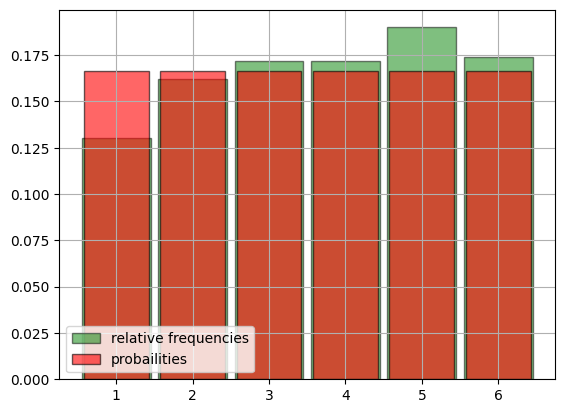

In [68]:
from matplotlib.pyplot import bar, hist, show, legend, grid

data = get_random_die_rolls()
bin_edges = [k + 0.5 for k in range(0,7)]

hist(data, bin_edges, density=True, rwidth=0.9, color='g', edgecolor='black', alpha=0.5, label='relative frequencies')

distribution = die_rolls_probabilities()
bar(distribution.keys(), distribution.values(),width=0.85, color = 'red', edgecolor='black', alpha=0.6, label='probailities')

legend(loc='lower left')
grid()
show()

In [36]:
def generate_sum_list(count=1000) -> list:
    sums = []
    balls = [1] * 6 + [0] * 4
    for _ in range(count):
        extracted_balls = choices(balls, k = 5)
        sums.append(sum(extracted_balls))
    return sums

In [38]:
print(generate_sum_list())

[3, 4, 4, 1, 4, 3, 4, 5, 4, 4, 0, 5, 4, 3, 3, 4, 3, 2, 3, 2, 2, 3, 2, 2, 2, 0, 5, 4, 4, 3, 3, 4, 2, 3, 3, 4, 3, 5, 1, 3, 1, 3, 2, 1, 2, 3, 3, 4, 4, 3, 3, 3, 3, 2, 4, 3, 1, 2, 3, 3, 3, 2, 4, 2, 2, 4, 4, 2, 3, 2, 3, 2, 4, 3, 3, 5, 3, 1, 3, 2, 1, 1, 4, 1, 3, 5, 5, 2, 3, 3, 4, 3, 3, 2, 3, 2, 3, 2, 0, 1, 3, 4, 4, 3, 2, 3, 2, 2, 3, 3, 1, 2, 4, 5, 2, 0, 3, 3, 2, 4, 3, 2, 2, 4, 4, 3, 2, 5, 4, 1, 2, 1, 2, 2, 1, 4, 2, 3, 4, 2, 2, 3, 3, 3, 3, 4, 4, 3, 2, 4, 4, 3, 2, 3, 3, 4, 3, 2, 2, 1, 2, 3, 3, 1, 2, 3, 2, 4, 4, 5, 1, 5, 4, 4, 3, 2, 4, 3, 4, 3, 5, 2, 4, 3, 4, 2, 2, 3, 3, 2, 3, 4, 3, 3, 4, 3, 4, 3, 4, 2, 4, 4, 1, 3, 4, 1, 3, 5, 4, 4, 5, 3, 4, 2, 3, 4, 4, 2, 2, 2, 1, 4, 2, 3, 2, 2, 3, 2, 2, 3, 4, 3, 2, 5, 2, 5, 3, 2, 4, 3, 2, 4, 2, 4, 4, 2, 2, 1, 3, 3, 4, 3, 2, 3, 1, 5, 4, 3, 2, 2, 5, 3, 4, 3, 4, 1, 4, 1, 3, 3, 2, 2, 4, 3, 3, 4, 3, 3, 4, 5, 1, 4, 3, 3, 3, 4, 3, 4, 3, 2, 3, 2, 3, 3, 2, 4, 2, 4, 3, 4, 4, 2, 1, 4, 1, 3, 1, 2, 3, 4, 4, 2, 3, 3, 3, 4, 3, 3, 3, 2, 4, 4, 4, 3, 2, 3, 3, 5, 3, 3, 3, 5, 2, 

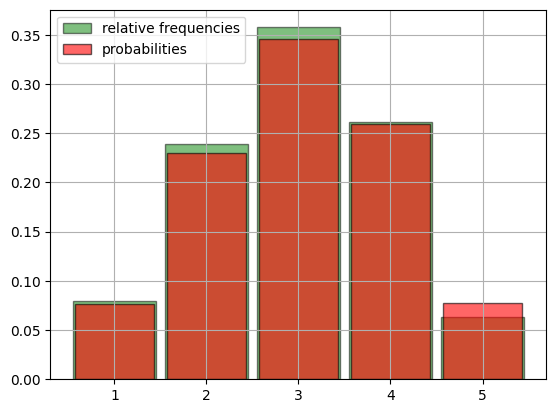

In [60]:
from scipy.stats import binom

data = generate_sum_list()
bin_edges = [k + 0.5 for k in range(0, 6)]

hist(data, bin_edges, density=True, rwidth=0.9, color='green', edgecolor='black', alpha=0.5, label='relative frequencies')

distribution_ = dict([(i, binom.pmf(i, n=5, p=6/10)) for i in range(1, 6)])

bar(distribution_.keys(), distribution_.values(), width=0.85, color = 'red', edgecolor='black', alpha=0.6, label='probabilities')

legend(loc='upper left')
grid()
show()

In [65]:
# P(2<X<=5)
def estimated_probability_X_between_2_and_5():
    sums = generate_sum_list()
    return sum([2 < x <=5 for x in sums]) / len(sums)

def theoretical_probability_X_between_2_and_5():
    return binom.cdf(5, n=5, p=6/10) - binom.cdf(2, n=5, p=6/10)

print(estimated_probability_X_between_2_and_5())
print(theoretical_probability_X_between_2_and_5())

0.69
0.6825599999999998


Recommended values: [10, 11]


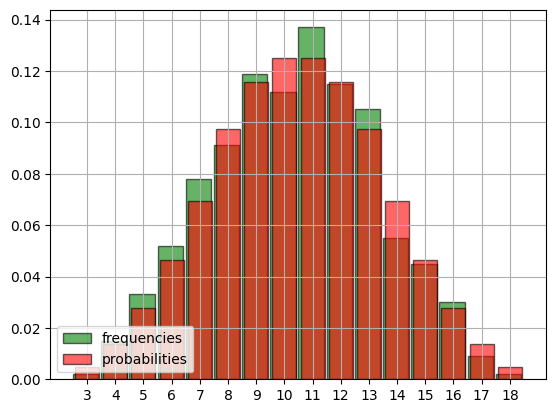

In [104]:
from matplotlib.pyplot import xticks


def generate_dice_sums(n = 1000):
    dice_sums = []
    for _ in range(n):
        dice_roll = [randrange(1,7) for _ in range(3)]
        dice_sum = sum(dice_roll)
        dice_sums.append(dice_sum)
    return dice_sums

def dice_sums_probabilities() -> dict:
    dice_sums_probs = {}
    # generate a list with all possible sums from all possible combinations of rolls
    possible_results = [x + y + z for x in range(1, 7) for y in range(1, 7) for z in range(1, 7)]
    dice_sums_probs = dict([(i, possible_results.count(i)/len(possible_results)) for i in possible_results])
    return dice_sums_probs

def get_best_numbers(dice_sums_probs: dict) -> list:
    best_value = max(dice_sums_probs.values())
    return [key for key, value in dice_sums_probs.items() if value == best_value]

# representing the estimated probabilities/frequencies of the sums we could get after we roll three dice
random_dice_sums = generate_dice_sums()
bin_edges =[k + 0.5 for k in range(2,19)]
    
hist(random_dice_sums, bin_edges, density=True, width=0.9, color = 'green', edgecolor='black', alpha=0.6, label='frequencies')

# representing the mathematical/theoretical probabilities of getting a certain sum after we roll the three dice
dice_sums_probabilities = dice_sums_probabilities()
bar(dice_sums_probabilities.keys(), dice_sums_probabilities.values(), width=0.85, color = 'red', edgecolor='black', alpha=0.6, label='probabilities')
print(f'Recommended values: {get_best_numbers(dice_sums_probabilities)}')

xticks([i for i in range(3, 19)])
legend(loc='lower left')
grid()
show()
# Answear: 11